In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

In [2]:
#load data
dataset=pd.read_csv(r'C:\eigene Dateien\2_TA\Data_Analytics\data\210310_Project Analytics Input_R&D_Scores_v5c.csv', encoding="ISO-8859-1")
dataset.shape
#dataset.head()
dataset.describe()


,Input:,SoP Year,Months between QG9-QG2,NY volume TARGET,Average variable cost per unit T-JPY (Target),Average CM per unit T-JPY (Target),CM per Year,R&D Total LC EA,CapEx EA,NRE EA,...,Overall project QG traffic light Green? QG7,Overall project QG traffic light Green? QG4,Overall project QG traffic light Green? QG2,FC project QG traffic light Green? QG7,FC project QG traffic light Green? QG4,FC project QG traffic light Green? QG2,Procurement traficlight at QG3 Red?,Traffic light RD at QG4 Red?,Traffic light QM at QG2 Red?,Experience of PL
count,0.0,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,...,27.000000,17.000000,9.000000,24.000000,15.000000,9.000000,11.0,14.000000,9.0,26.000000
mean,NaN,2020.451613,33.548387,11255.774194,7367.935484,1718.903226,6.889860e+06,20.963871,5.678065,0.933226,...,0.074074,0.588235,0.111111,0.166667,0.200000,0.111111,0.0,0.071429,0.0,2.269231
std,NaN,1.588263,10.938735,14339.212330,6629.892000,2317.644844,7.681989e+06,24.283527,9.813472,1.711883,...,0.266880,0.939336,0.333333,0.380693,0.414039,0.333333,0.0,0.267261,0.0,0.777570
min,NaN,2017.000000,12.000000,100.000000,602.000000,0.000000,0.000000e+00,2.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000
25%,NaN,2019.000000,24.500000,644.000000,2455.500000,311.000000,8.194295e+05,6.900000,1.100000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.000000
50%,NaN,2021.000000,35.000000,9036.000000,5235.000000,691.000000,3.868070e+06,10.700000,1.800000,0.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.000000
75%,NaN,2022.000000,41.000000,11754.500000,11041.500000,1916.000000,1.204764e+07,25.500000,5.200000,1.050000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.000000
max,NaN,2022.000000,56.000000,51495.000000,25712.000000,8928.000000,2.505360e+07,113.800000,50.000000,8.840000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,3.000000


In [19]:



#seperate features x and target y

#dataset=dataset[dataset['Component project'] != 1]
#dataset=dataset[dataset['LDT'] != 1]
#dataset=dataset[dataset['NY volume TARGET'] > 500 ]
#dataset=dataset[dataset['NY volume TARGET'] < 50000 ]
#dataset=dataset[dataset['IE'] != 1]
#dataset=dataset[dataset['IE'] != 1]
#dataset=dataset[dataset['LB'] != 1]
#dataset=dataset[dataset['HB'] != 1]
#dataset=dataset[dataset['TA Classic?'] == 1]
dataset=dataset[dataset['R&D Total LC EA'].notna()]
dataset=dataset[dataset['Total funding LC EA'] > 3]
dataset=dataset[dataset['Total funding LC EA'] < 150]
y=dataset.iloc[:,9]
#x=dataset.iloc[:,np.r_ [5:9, 24:29, 30:36]]
x=dataset.iloc[:,np.r_ [25:29,31:33]]
#Scale all features of dataset to 0 to 1 range to avoid distortions during PCA and clustering. 
#Convert np array back to a panda DataFrame and add back column header cut off by sklearn preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xs = scaler.fit_transform(x)
x= pd.DataFrame(xs, columns=x.columns)
x=x.fillna(0)

In [20]:
x.columns

Index(['Int. Facelift & Telematics', 'New E/E structure',
       'New Safety features/Safety regulation', 'New emission Standard',
       'Scope of New & changed parts', 'Technological Ambition'],
      dtype='object')

In [21]:
x


,Int. Facelift & Telematics,New E/E structure,New Safety features/Safety regulation,New emission Standard,Scope of New & changed parts,Technological Ambition
0,0.50,1.0,0.666667,0.50,0.4,0.50
1,0.00,0.5,0.333333,0.50,0.5,0.00
2,0.25,0.5,0.333333,0.00,0.1,0.50
3,0.50,0.5,0.666667,0.00,0.0,0.50
4,0.00,0.0,0.333333,0.25,0.8,0.00
5,0.00,0.0,0.333333,0.25,0.1,0.50
6,0.50,0.0,0.333333,0.00,0.1,0.50
7,0.00,0.0,0.000000,0.00,0.0,0.50
8,0.00,0.0,0.000000,0.00,0.1,0.00
9,0.25,0.5,0.666667,0.00,0.0,0.50


In [22]:
#divide dataset into training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [23]:
#load linear model from Scikit learn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Int. Facelift & Telematics,-1.321105
New E/E structure,30.201694
New Safety features/Safety regulation,-14.838320
New emission Standard,0.115966
Scope of New & changed parts,26.040343
Technological Ambition,23.920903


In [25]:
#name=dataset.iloc[:,0]
name=pd.DataFrame(dataset.iloc[:,0])
print ('Index',  name)

Index                                  Project name
0             TA Fighter MY19(Vehicle&Engine)
1                         4P10 Euro VI Step D
2                           UB Aero Star MY19
3                          UF Aero Queen MY19
4                    TF Canter Euro VI Taiwan
5                              TF Canter MY19
6                              TF Canter MY20
7                    TG Supaer Great GATS 2.0
8              TG Super Great 12.8L to AUS/NZ
9                         TG Super Great MY19
10               TG Super Great FX (6x6) MY21
11                      TD Colt Diesel EuroIV
12          TF Canter Euro V Emerging Markets
13                   TF Canter Euro VI Step E
14  TA Fighter for the World (Vehicle&Engine)
15                               UG Rosa MY21
16                        TF Canter MY21 (W0)
17                        TF Canter MY21 (W1)
18                        TG Super Great MY21
19                     TA Fighter MY21 (W1&2)
20                       TA 

In [26]:
#predict: y_pred = RD Total funding
y_pred = regressor.predict(x_test)
#prozentuale Abweichung delta (Predicted-Actual)/Actual
delta = (y_pred-y_test)/y_test
df=pd.DataFrame( {'Actual': y_test, 'Predicted': y_pred, 'delta' : delta })
#Merge Dataframe df mit Project_Name aus Basis dataset
df=pd.concat([name, df] , axis=1).reindex(df.index)
df=df.style.format({'Actual': '{:,.1f}', 'Predicted':'{:,.1f}', 'delta' : '{:,.0%}' })
df

,Project name,Actual,Predicted,delta
2,UB Aero Star MY19,7.9,22.6,186%
29,eAxle,40.0,48.3,21%
13,TF Canter Euro VI Step E,52.6,20.1,-62%
10,TG Super Great FX (6x6) MY21,13.1,30.2,130%
26,eCanter 1.0,50.0,34.9,-30%
24,UF Black Hawk,30.3,47.8,58%


In [27]:
from sklearn import metrics
 
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squarer Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('Mean Absolute Percentage Error:', np.mean(np.abs((y_test-y_pred)/y_test))*100, "%")

Mean Absolute Error: 17.529392438791493
Mean Squared Error: 361.1601979204036
Root Mean Squarer Error: 19.00421526715596
Mean Absolute Percentage Error: 81.18219248349118 %


In [28]:
import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from sklearn.inspection import permutation_importance

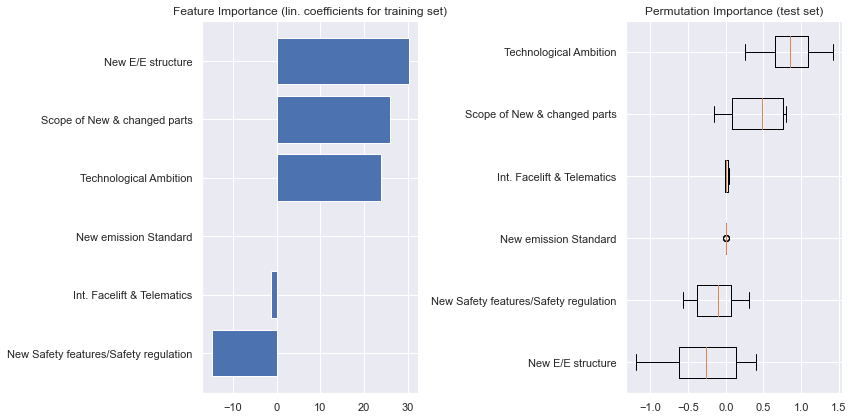

In [29]:
feature_importance = regressor.coef_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance (lin. coefficients for training set)')

result = permutation_importance(regressor, x_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(x_test.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [30]:
def simple_scatter_plot(x_data, y_data, output_filename, title_name, x_axis_label, y_axis_label):
   
    seaborn.set(color_codes=True)
    matplotlib.figure(1, figsize=(9, 6))
 
    matplotlib.title(title_name)
 
    ax = seaborn.scatterplot(x=x_data, y=y_data)
 
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)
 
    matplotlib.savefig(output_filename, bbox_inches='tight', dpi=300)

 

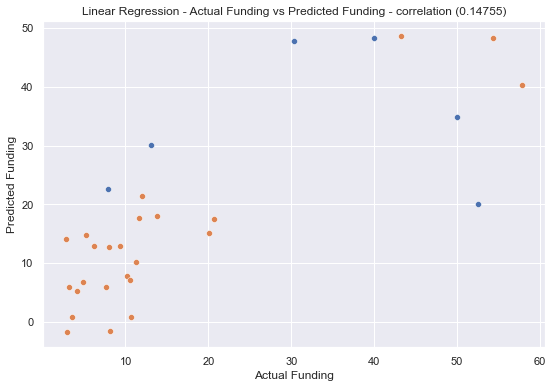

In [31]:
# correlation between Actual and prediction 
correlation = round(pearsonr(y_pred, y_test)[0], 5)
y_pred1 = regressor.predict(x_train) 
output_filename = "rf_regression.png"
title_name = "Linear Regression - Actual Funding vs Predicted Funding - correlation ({})".format(correlation)
x_axis_label = "Actual Funding"
y_axis_label = "Predicted Funding"
 
# plot data
simple_scatter_plot(y_test, y_pred, output_filename, title_name, x_axis_label, y_axis_label)
simple_scatter_plot(y_train, y_pred1, output_filename, title_name, x_axis_label, y_axis_label)

In [32]:
#Actual vs prediction using trainingsdata considered in model
#y1_pred = regressor.predict(x_train)
#delta = (y1_pred-y_train)/y_train
#name=y1_pred.iloc[:,0]
#df1=pd.DataFrame({ 'Actual' : y_train, 'Predicted': y1_pred, 'delta' : delta })


#df1=df1.style.format({ 'Actual': '{:,.1f}', 'Predicted':'{:,.1f}', 'delta' : '{:,.0%}' })

#predict: y_pred = RD Total funding
y1_pred = regressor.predict(x_train)
#prozentuale Abweichung delta (Predicted-Actual)/Actual
delta = (y1_pred-y_train)/y_train
df1=pd.DataFrame( {'Actual': y_train, 'Predicted': y1_pred, 'delta' : delta })
#Merge Dataframe df mit Project_Name aus Basis dataset
df1=pd.concat([name, df1] , axis=1).reindex(df1.index)
df1=df1.style.format({'Actual': '{:,.1f}', 'Predicted':'{:,.1f}', 'delta' : '{:,.0%}' })
df1


,Project name,Actual,Predicted,delta
27,eCanter 1.1,4.1,5.2,28%
11,TD Colt Diesel EuroIV,10.7,0.9,-92%
17,TF Canter MY21 (W1),43.2,48.7,13%
22,IE 4M50 China 4,9.3,12.9,39%
5,TF Canter MY19,10.2,7.9,-23%
16,TF Canter MY21 (W0),8.0,12.8,60%
8,TG Super Great 12.8L to AUS/NZ,3.5,0.8,-76%
14,TA Fighter for the World (Vehicle&Engine),20.7,17.5,-16%
23,IE 4V22 China 4,6.2,12.9,108%
20,TA Fighter MY21 (W3),7.6,6.0,-21%


In [33]:
from sklearn import metrics
 
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print ('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print ('Root Mean Squarer Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print ('Mean Absolute Percentage Error:', np.mean(np.abs((y_train-y1_pred)/y_train))*100, "%")

Mean Absolute Error: 5.5922502122226305
Mean Squared Error: 46.168457202175354
Root Mean Squarer Error: 6.794737463815313
Mean Absolute Percentage Error: 72.5460258950969 %


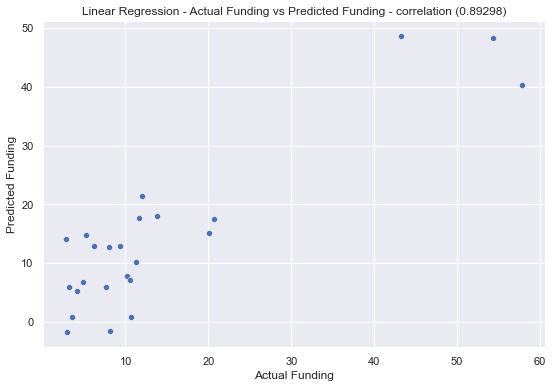

In [34]:
# correlation between Actual and prediction from training data
correlation = round(pearsonr(y1_pred, y_train)[0], 5)
 
output_filename = "rf_regression.png"
title_name = "Linear Regression - Actual Funding vs Predicted Funding - correlation ({})".format(correlation)
x_axis_label = "Actual Funding"
y_axis_label = "Predicted Funding"
 
# plot data
simple_scatter_plot(y_train, y1_pred, output_filename, title_name, x_axis_label, y_axis_label)

In [35]:
df1 ['delta'].plot(kind='kde')

TypeError: 'Styler' object is not subscriptable